<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

## Entendiendo la Regresión Lineal Simple

La regresión lineal simple es una técnica estadística que nos permite modelar la relación entre dos variables continuas. Una variable, denotada como $X$, se considera la variable independiente o predictora, y la otra, denotada como $Y$, es la variable dependiente o de respuesta. El objetivo es encontrar una línea recta que mejor se ajuste a los datos, de modo que podamos predecir el valor de $Y$ a partir de un valor dado de $X$.

La ecuación de esta recta se representa como:

$$Y = \theta_0 + \theta_1X + \epsilon$$

Donde:

  * **$Y$** es la variable dependiente que queremos predecir (en nuestro caso, el peso).
  * **$X$** es la variable independiente que usamos para predecir (la altura).
  * **$\theta_0$** es el **intercepto**, el valor de $Y$ cuando $X$ es 0.
  * **$\theta_1$** es la **pendiente**, que nos dice cuánto cambia $Y$ por cada unidad de cambio en $X$.
  * **$\epsilon$** es el término de error, que representa la variabilidad en $Y$ que no puede ser explicada por $X$.

-----

### Paso 1: Preparación del Entorno y Carga de Datos

Primero, importaremos las librerías necesarias y cargaremos nuestro conjunto de datos. Usaremos `pandas` para la manipulación de datos, `numpy` para operaciones numéricas, `matplotlib` y `seaborn` para la visualización, y `statsmodels` y `sklearn` para construir los modelos.


-----

In [5]:
# Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el dataset
# Este es un dataset clásico usado comúnmente para ejemplos de regresión.
# Lo cargaremos directamente desde una URL para fácil reproducibilidad.
archivo = 'alturas-pesos.csv'
data = pd.read_csv(archivo)

# Mostramos las 5 primeras filas del dataframe
print("Primeras 5 filas del dataset:")
print(data.head())

# Vemos la información general del dataset
print("\nInformación general del dataset:")
data.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

Primeras 5 filas del dataset:
     Sexo  Peso  Altura
0  Hombre   109     187
1  Hombre    73     174
2  Hombre    96     188
3  Hombre    99     182
4  Hombre    93     177

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sexo    10000 non-null  object
 1   Peso    10000 non-null  int64 
 2   Altura  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB

Estadísticas descriptivas:
               Peso        Altura
count  10000.000000  10000.000000
mean      72.733900    168.073300
std       14.572204      9.775269
min       29.000000    137.000000
25%       61.000000    161.000000
50%       73.000000    168.000000
75%       84.000000    175.000000
max      122.000000    200.000000


### Paso 2: Análisis Exploratorio de Datos (EDA)

Antes de construir el modelo, es crucial entender nuestros datos. Un diagrama de dispersión es ideal para visualizar la relación entre la altura y el peso.

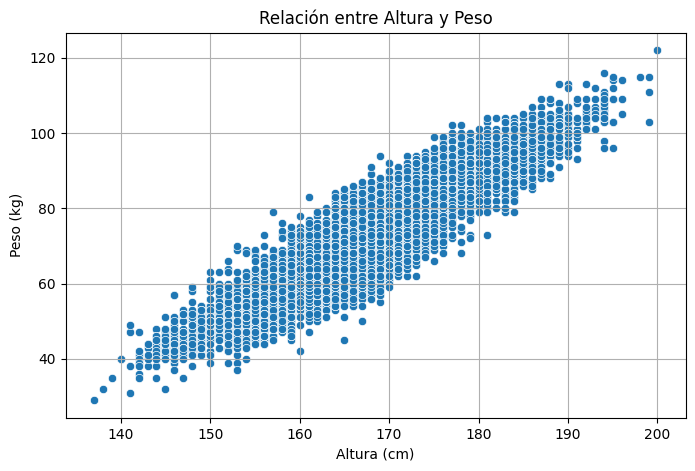

In [15]:
# Gráfico de dispersión para visualizar la relación
plt.figure(figsize=(8,5))

sns.scatterplot(x='Altura', y='Peso', data=data)
plt.title('Relación entre Altura y Peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()


Como podemos observar en el gráfico, existe una clara **relación lineal positiva** entre la altura y el peso. A medida que la altura aumenta, el peso también tiende a aumentar. Esto confirma que la regresión lineal simple es un enfoque apropiado.

-----

### Paso 3: Construcción del Modelo con `statsmodels`

`statsmodels` es una excelente librería para modelado estadístico, ya que proporciona resúmenes muy detallados y pruebas de significancia.


In [ ]:
!pip install statsmodels

In [8]:
# Importamos la librería para el modelo de Mínimos Cuadrados Ordinarios (OLS)
import statsmodels.api as sm

# Definimos nuestras variables
# 'sm.add_constant' es importante para añadir la columna del intercepto (β₀)
X = sm.add_constant(data['Altura'])
Y = data['Peso']

# Creamos y ajustamos el modelo
modelo_sm = sm.OLS(Y, X).fit()

# Mostramos el resumen del modelo
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 5.846e+04
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:18:04   Log-Likelihood:                -31361.
No. Observations:               10000   AIC:                         6.273e+04
Df Residuals:                    9998   BIC:                         6.274e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -158.8003      0.959   -165.558      0.0



#### Interpretación del Resumen de `statsmodels`

El resumen de `statsmodels` es increíblemente rico en información:

  * **R-squared (R²)**: El valor de **0.857** nos indica que el **85.7% de la variabilidad en el peso puede ser explicada por la altura**. Es una medida de qué tan bien nuestro modelo se ajusta a los datos.
  * **Coefficients (Coeficientes)**:
      * `const` (Intercepto, $\\theta\_0$): El valor es **-158.8003**. Teóricamente, este sería el peso de una persona con 0 pulgadas de altura, lo cual no tiene sentido en nuestro contexto. El intercepto a menudo sirve como punto de partida para la línea de regresión y no siempre tiene una interpretación práctica.
      * `Altura` (Pendiente, $\\theta\_1$): El valor es **1.3776**. Esto significa que por cada cm adicional de altura, se espera que el peso aumente en promedio **1.3776 kg**.
  * **P\>|t| (P-valor)**: Para ambos coeficientes, el p-valor es **0.000**, que es mucho menor que el nivel de significancia estándar (0.05). Esto indica que ambos coeficientes son **estadísticamente significativos**.


-----

### Paso 4: Construcción del Modelo con `scikit-learn`

`scikit-learn` es la librería de referencia para el machine learning en Python. Su API es muy consistente y fácil de usar para construir y evaluar modelos.

In [16]:
# Importamos la clase LinearRegression y train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definimos X e y
# En sklearn, X debe ser un array 2D, por eso usamos [['Altura']]
X_sk = data[['Altura']]
y_sk = data['Peso']

# Dividimos los datos en entrenamiento y prueba (buena práctica)
X_train, X_test, y_train, y_test = train_test_split(X_sk, y_sk, test_size=0.2, random_state=42)

# Creamos la instancia del modelo
modelo_sk = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_sk.fit(X_train, y_train)

# Obtenemos los coeficientes
print(f"Intercepto (theta₀): {modelo_sk.intercept_}")
print(f"Pendiente (theta₁): {modelo_sk.coef_[0]}")

Intercepto (theta₀): -158.39556462718966
Pendiente (theta₁): 1.3750093102090961


Los coeficientes obtenidos con `sklearn` son prácticamente idénticos a los de `statsmodels`, lo que confirma la consistencia entre ambas librerías.

#### Visualización del Modelo

Ahora, grafiquemos la línea de regresión que hemos encontrado sobre nuestros datos.


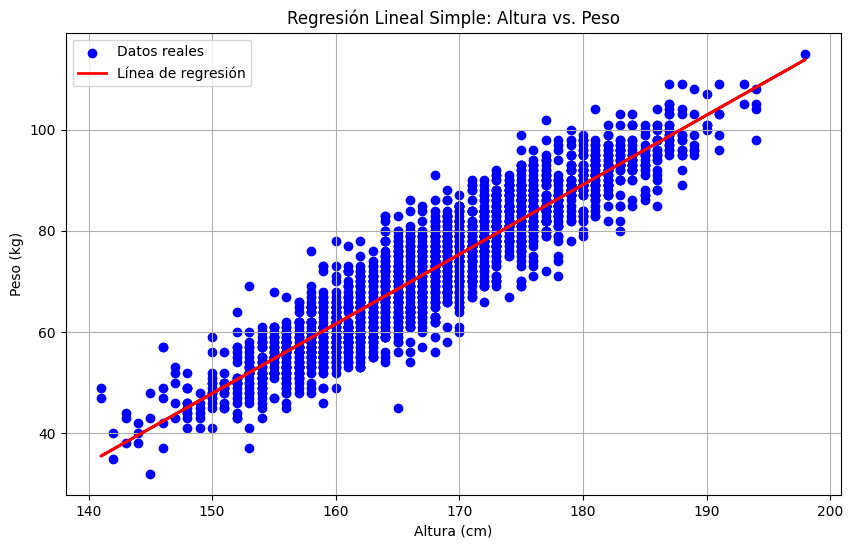

In [18]:
# Hacemos predicciones sobre el conjunto de prueba
y_pred = modelo_sk.predict(X_test)

# Graficamos los datos originales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal Simple: Altura vs. Peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.grid(True)
plt.show()


### Paso 5: Métricas del Modelo y su Interpretación

Para evaluar qué tan bueno es nuestro modelo, la inspección visual no es suficiente. Necesitamos métricas cuantitativas. 📊

#### Métricas Clave:

  * **Coeficiente de Determinación ($R^2$)**:

      * **Qué es**: Como mencionamos, representa la proporción de la varianza de la variable dependiente que es predecible a partir de la(s) variable(s) independiente(s).
      * **Rango**: Va de 0 a 1. Un valor cercano a 1 indica que el modelo explica una gran parte de la variabilidad de los datos.
      * **Cálculo en `sklearn`**:
        ```python
        from sklearn.metrics import r2_score
        r2 = r2_score(y_test, y_pred)
        print(f"Coeficiente de Determinación (R²): {r2:.4f}")
        ```

  * **Error Cuadrático Medio (MSE - Mean Squared Error)**:

      * **Qué es**: Es el promedio de los errores al cuadrado, es decir, la diferencia entre el valor real y el valor predicho. Penaliza más los errores grandes debido al término cuadrático.
      * **Fórmula**: $MSE = \frac{1}{n}\\sum\_{i=1}^{n}(Y\_i - \\hat{Y}\_i)^2$
      * **Interpretación**: Un valor más bajo indica un mejor ajuste. Su unidad es el cuadrado de la unidad de la variable objetivo (ej. kg²), lo que dificulta su interpretación directa.

  * **Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error)**:

      * **Qué es**: Es simplemente la raíz cuadrada del MSE. La ventaja es que la unidad del error es la misma que la de la variable objetivo (ej. libras).
      * **Fórmula**: $RMSE = \\sqrt{MSE}$
      * **Interpretación**: Nos dice, en promedio, qué tan lejos están nuestras predicciones del valor real. Un RMSE de, por ejemplo, 10, significaría que nuestras predicciones de peso se equivocan en promedio por 10 kg.

  * **Error Absoluto Medio (MAE - Mean Absolute Error)**:

      * **Qué es**: Es el promedio de las diferencias absolutas entre los valores reales y los predichos.
      * **Fórmula**: $MAE = \frac{1}{n} \sum\_{i=1}^{n}\|Y\_i - \hat{Y}\_i\|$
      * **Interpretación**: Similar al RMSE, pero es menos sensible a los valores atípicos (outliers) ya que no eleva los errores al cuadrado. Un MAE de 8 significa que, en promedio, nuestras predicciones se desvían en 8 kg.

<!-- end list -->


In [12]:
# Cálculo de métricas con sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")

Error Cuadrático Medio (MSE): 30.9996
Raíz del Error Cuadrático Medio (RMSE): 5.5677
Error Absoluto Medio (MAE): 4.4201


In [19]:

archivo = 'Ice_cream_selling_data.csv'
data = pd.read_csv(archivo)

In [20]:
data

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [21]:
# Importamos la librería para el modelo de Mínimos Cuadrados Ordinarios (OLS)
import statsmodels.api as sm

# Definimos nuestras variables
# 'sm.add_constant' es importante para añadir la columna del intercepto (β₀)
X = sm.add_constant(data['Temperature (°C)'])
Y = data['Ice Cream Sales (units)']

# Creamos y ajustamos el modelo
modelo_sm = sm.OLS(Y, X).fit()

# Mostramos el resumen del modelo
print(modelo_sm.summary())

                               OLS Regression Results                              
Dep. Variable:     Ice Cream Sales (units)   R-squared:                       0.031
Model:                                 OLS   Adj. R-squared:                  0.010
Method:                      Least Squares   F-statistic:                     1.488
Date:                     Wed, 06 Aug 2025   Prob (F-statistic):              0.229
Time:                             16:41:31   Log-Likelihood:                -191.09
No. Observations:                       49   AIC:                             386.2
Df Residuals:                           47   BIC:                             390.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------